In [80]:
# import packages
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r'C:\Users\yarde\OneDrive\שולחן העבודה\activities (1).csv')
df.head(3)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.sport_type"">Sport Type</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_steps"">Total Steps</span>",Media
0,2338807591,"May 3, 2019, 1:05:00 PM",First run through Larum,Run,NaN,3300,10.50,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2346077258,"May 6, 2019, 9:45:12 AM",Achterin Larum,Run,NaN,3795,12.21,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2356481488,"May 10, 2019, 2:56:37 PM",Afternoon Run,Run,NaN,3347,10.74,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Positions of relevant columns
usecols = [0, 1, 2, 3, 6, 16, 20]

# English column names
names = [
    "activity_id",
    "activity_date",
    "activity_name",
    "activity_type",
    "distance_km",
    "moving_time_s",
    "elevation_gain"
]

# Reading the raw data with preprocessing, have header.
df = pd.read_csv(
    r'C:\Users\yarde\OneDrive\שולחן העבודה\activities (1).csv',
    parse_dates=[1],
    header=0,
    usecols=usecols,
    names=names
)

df

C:\Users\yarde\AppData\Local\Temp\ipykernel_30576\3660454394.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,activity_id,activity_date,activity_name,activity_type,distance_km,moving_time_s,elevation_gain
0,2338807591,2019-05-03 13:05:00,First run through Larum,Run,10.50,3300.0,NaN
1,2346077258,2019-05-06 09:45:12,Achterin Larum,Run,12.21,3795.0,11.702857
2,2356481488,2019-05-10 14:56:37,Afternoon Run,Run,10.74,3279.0,8.453333
3,2363764641,2019-05-13 08:50:43,Morning Run,Run,9.13,2985.0,14.285314
4,2382336299,2019-05-20 09:11:35,Lunch Run,Run,13.48,4126.0,13.873595
...,...,...,...,...,...,...,...
505,9503913209,2023-07-23 05:02:30,Morning Run,Run,6.06,2342.0,84.807617
506,9506945648,2023-07-23 13:24:33,La Vouarda - Moiry - Zinal pt 2,Hike,8.99,4827.0,14.222074
507,9506971960,2023-07-23 07:31:22,La Vouarda - Moiry - Zinal pt 1,Hike,14.92,14268.0,1178.954102
508,9524998050,2023-07-26 09:37:43,Tignousa - Zinal,Run,17.58,7951.0,577.391541


In [16]:
# Look at runs only
runs = df[df["activity_type"] == "Run"]
runs.dtypes

activity_id                int64
activity_date     datetime64[ns]
activity_name             object
activity_type             object
distance_km               object
moving_time_s            float64
elevation_gain           float64
dtype: object

In [22]:
# Convert distance_km to a float, and calculate average speed, km per hour
runs.loc[:, 'distance_km'] = runs['distance_km'].replace(",", "", regex=True).astype(float)
runs.loc[:, 'speed_kmh'] = runs['distance_km'] / (runs['moving_time_s'] / 3600)
print(runs['speed_kmh'].mean())

11.708287720582742


## Analyzing distances

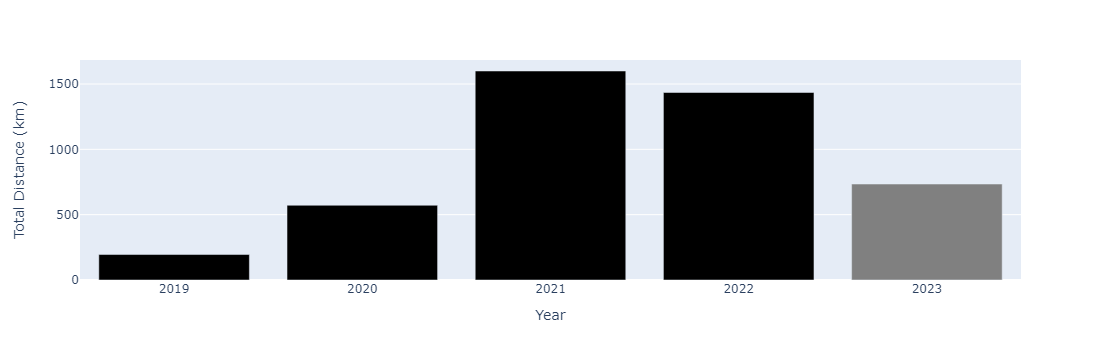

In [44]:
distance_per_year = runs.groupby(runs["activity_date"].dt.year)['distance_km'].sum().reset_index()
fig= px.bar(distance_per_year, x="activity_date",y="distance_km", labels={"activity_date":"Year", "distance_km":"Total Distance (km)"})
#make 2023 a different color
colors = ['grey' if year == 2023 else 'black' for year in distance_per_year["activity_date"]]
fig.update_traces(marker_color=colors)
fig.show()

In [52]:
# cumulative area plot
distance_per_year['cumulative_distance'] = distance_per_year['distance_km'].cumsum()
distance_per_year

,activity_date,distance_km,cumulative_distance
0,2019,194.91,194.91
1,2020,571.90,766.81
2,2021,1599.62,2366.43
3,2022,1435.09,3801.52
4,2023,734.53,4536.05


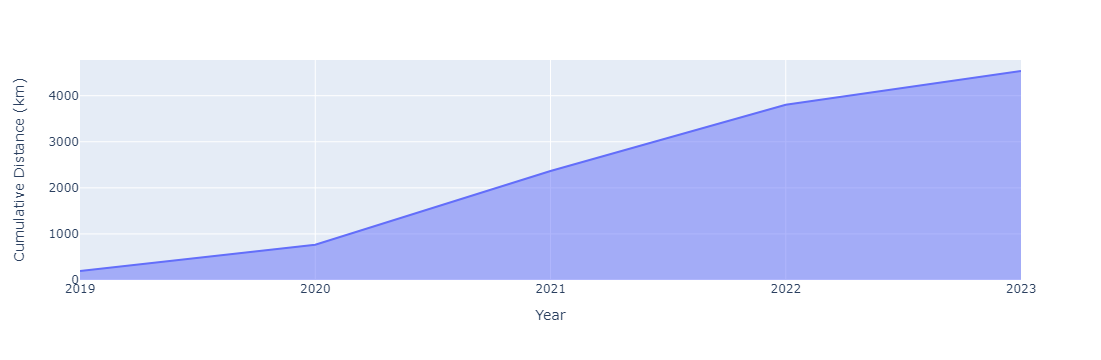

In [55]:
fig = px.area(distance_per_year, y="cumulative_distance", x="activity_date", labels={"activity_date":"Year","cumulative_distance":"Cumulative Distance (km)"})
fig.update_xaxes(tickvals=distance_per_year['activity_date'], ticktext=distance_per_year['activity_date'])
fig.show()

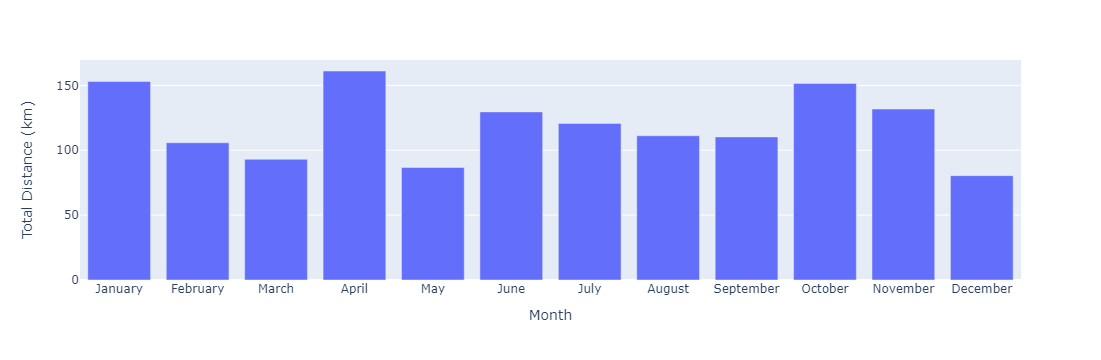

In [63]:
runs_2022 = runs[runs["activity_date"].dt.year == 2022]
distance_per_month = runs_2022.groupby(runs["activity_date"].dt.month)['distance_km'].sum().reset_index()

distance_per_month['month_name'] = pd.to_datetime(distance_per_month['activity_date'], format='%m').dt.strftime('%B')

fig= px.bar(distance_per_month, x="month_name",y="distance_km", labels={"month_name":"Month", "distance_km":"Total Distance (km)"})
fig.show()

## Analyzing speed

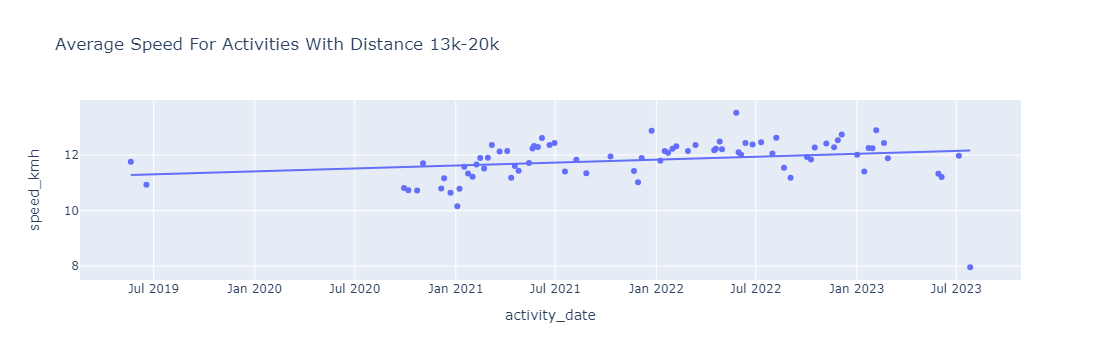

In [74]:
# average speed for activities with distance 13k-20k
filtered_runs = runs[(13<= runs['distance_km']) & (runs['distance_km']<=20)]

fig = px.scatter(filtered_runs, x="activity_date", y="speed_kmh",title="Average Speed For Activities With Distance 13k-20k", trendline='ols')
fig.show()

## Records

In [77]:
# activity with highest speed
highest_speed_row = runs.loc[runs["speed_kmh"].idxmax()]
highest_speed_row

activity_id                     6675426960
activity_date          2022-02-13 09:20:14
activity_name             Midwinterjogging
activity_type                          Run
distance_km                           5.25
moving_time_s                       1207.0
elevation_gain                    8.533334
speed_kmh                        15.658658
cumulative_distance                2570.71
Name: 305, dtype: object

In [78]:
highest_elevation_gain_row = runs.loc[runs["elevation_gain"].idxmax()]

## Identifying patterns

In [86]:
runs.loc[:, 'start_hour'] = runs['activity_date'].dt.hour
runs.loc[:, 'year'] = runs['activity_date'].dt.year

runs_by_hour = runs.groupby(['year','start_hour']).size().reset_index(name='count')
runs_by_hour

,year,start_hour,count
0,2019,6,1
1,2019,8,1
2,2019,9,2
3,2019,10,3
4,2019,12,1
...,...,...,...
63,2023,15,2
64,2023,16,4
65,2023,17,2
66,2023,18,2


C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



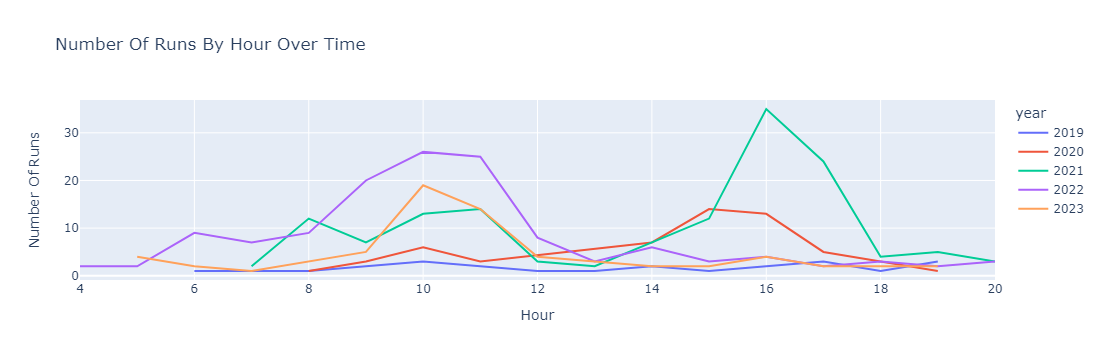

In [92]:
fig = px.line(runs_by_hour, x="start_hour", y="count", color="year",title="Number Of Runs By Hour Over Time", labels={"start_hour":"Hour", "count":"Number Of Runs"})
fig.show()

In [94]:
#pivot the data
runs.loc[:, 'start_hour'] = runs['activity_date'].dt.hour

runs_by_hour = runs.groupby([runs['activity_date'].dt.year,'start_hour']).size().reset_index(name='count')

runs_by_hour_pivot = runs_by_hour.pivot(index="start_hour", columns="activity_date", values="count")
runs_by_hour_pivot

activity_date,2019,2020,2021,2022,2023
start_hour,,,,,
4,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,NaN,2.0,4.0
6,1.0,NaN,NaN,9.0,2.0
7,NaN,NaN,2.0,7.0,1.0
8,1.0,1.0,12.0,9.0,3.0
9,2.0,3.0,7.0,20.0,5.0
10,3.0,6.0,13.0,26.0,19.0
11,NaN,3.0,14.0,25.0,14.0
12,1.0,NaN,3.0,8.0,4.0


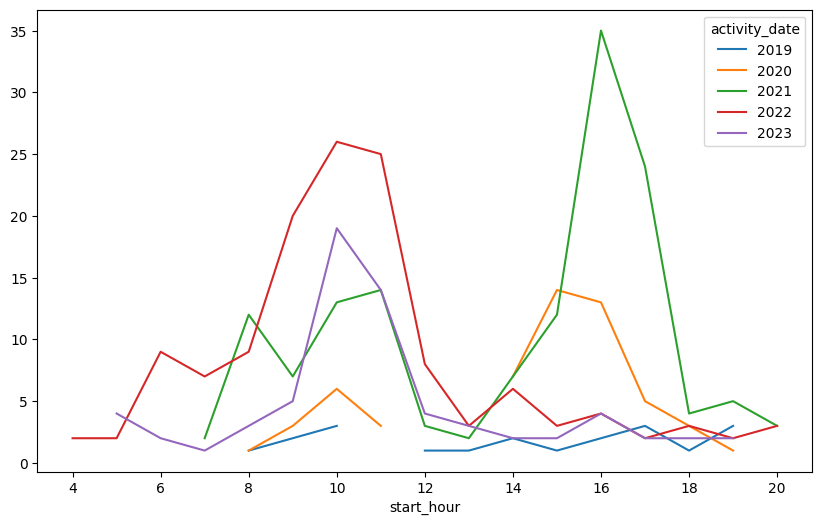

In [98]:
runs_by_hour_pivot.plot(kind="line",figsize=(10,6))
plt.show()

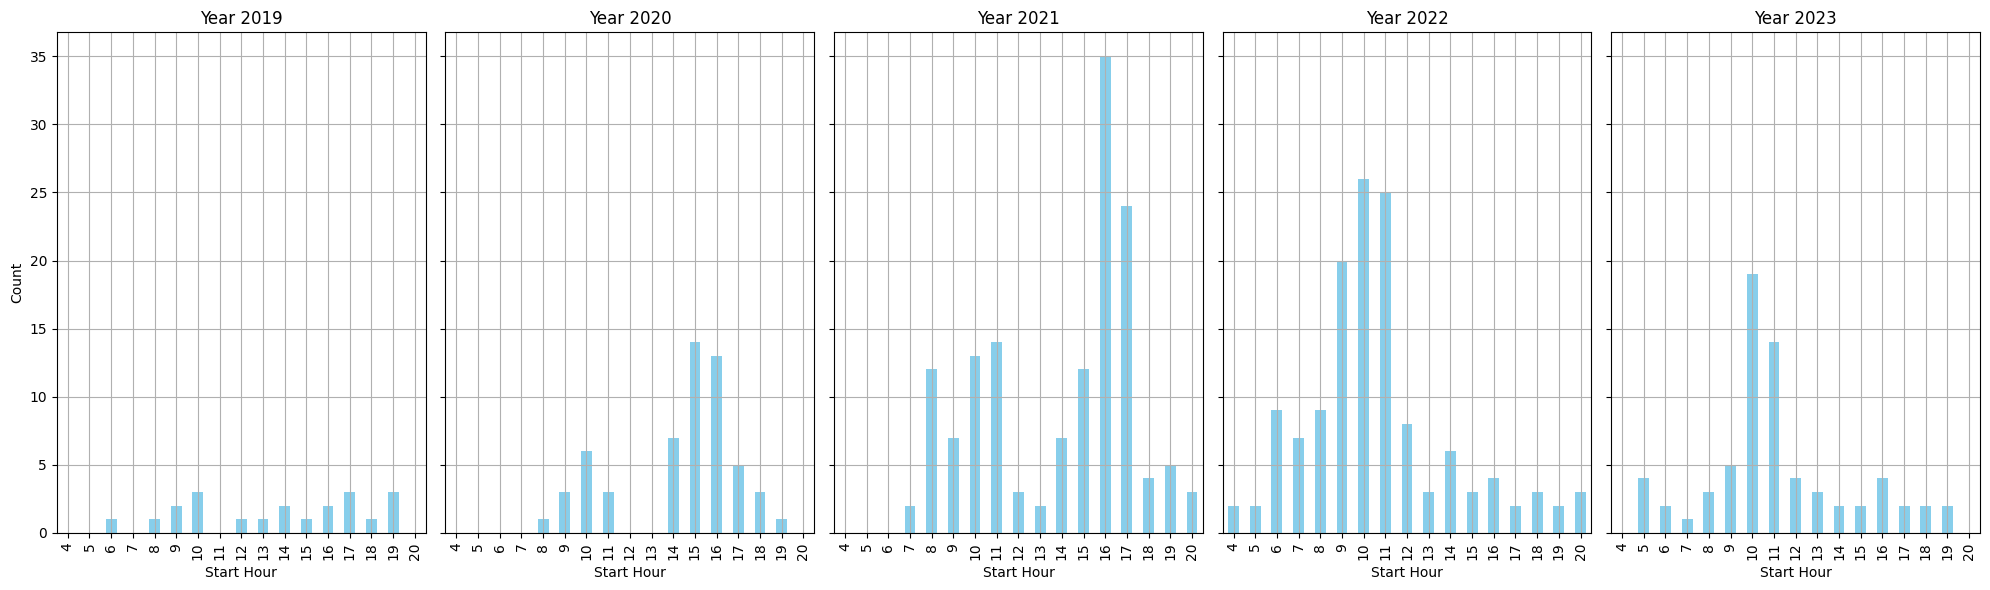

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=len(runs_by_hour_pivot.columns), figsize=(20, 6), sharey=True)

# Iterate over each column (each year) and create a bar plot
for i, (year, data) in enumerate(runs_by_hour_pivot.items()):
    ax = axes[i]
    data.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Start Hour')
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()